# Kelompok 4_Final Project 3

Nama Kelompok: 
1. Karina Jeanne Natasya
2. Maulida Afifah
3. Kenny Oktavianus U Sibarani

# Project Overview

### Latar Belakang
Gagal jantung (Heart Failure) adalah kondisi serius yang dapat mempengaruhi kualitas hidup dan kematian pasien. Analisis faktor yang terkait dengan risiko kematian pada pasien gagal jantung dapat memberikan wawasan penting untuk pengembangan intervensi atau metode prediktif yang lebih baik. Oleh karena itu Dataset "Heart Failure Prediction" dipilih sebagai sumber data untuk mempelajari dan memahami faktor-faktor yang mempengaruhi risiko kematian pada pasien gagal jantung.

### Data yang Digunakan
Dataset "Heart Failure Prediction" berasal dari platform Kaggle. Data dalam dataset ini dikumpulkan dari studi klinis dan penelitian terkait gagal jantung. Dataset ini berisi 13 kolom. Berikut adalah penjelasan singkat tentang setiap kolom:

    1. Age: Usia pasien (tahun).
    2. Anaemia: Indikator apakah pasien menderita anemia (0 = Tidak, 1 = Ya).
    3. High Blood Pressure: Indikator apakah pasien menderita tekanan darah tinggi (0 = Tidak, 1 = Ya).
    4. Creatinine Phosphokinase (CPK): Tingkat enzim CPK dalam darah pasien (mcg/L).
    5. Diabetes: Indikator apakah pasien menderita diabetes (0 = Tidak, 1 = Ya).
    6. Ejection Fraction: Persentase darah yang dikeluarkan oleh ventrikel kiri pada setiap kontraksi jantung (%).
    7. Platelets: Jumlah platelet dalam darah pasien (kiloplatelets/mL).
    8. Sex: Jenis kelamin pasien (0 = Perempuan, 1 = Laki-laki).
    9. Serum Creatinine: Tingkat kreatinin dalam darah pasien (mg/dL).
    10. Serum Sodium: Tingkat natrium dalam darah pasien (mEq/L).
    11. Smoking: Indikator apakah pasien merokok (0 = Tidak, 1 = Ya).
    12. Time: Periode waktu yang diukur dalam hari sejak awal pengamatan.
    13. Death Event: Indikator apakah pasien meninggal selama periode pengamatan (0 = Tidak, 1 = Ya).
    
### Object yang ingin dicapai
Tujuan dari analisis ini adalah untuk mengembangkan model prediktif yang dapat memperkirakan risiko kematian pada pasien dengan gagal jantung berdasarkan faktor-faktor klinis yang ada dalam dataset. Dengan memanfaatkan atribut-atribut seperti usia, tekanan darah tinggi, diabetes, dan faktor lainnya, kami bertujuan untuk mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi risiko kematian pada pasien gagal jantung.

Final Project 3 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

    ● Mampu memahami konsep Classification dengan Ensemble Model
    ● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
    ● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# Import Libary

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [98]:
# Import dataset 
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [99]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [100]:
heart_failure.shape

(299, 13)

In [101]:
heart_failure.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [102]:
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Data Cleaning

In [103]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


    ● Setiap kolom memiliki tipe data int64 atau float64. Meskipun demikian, beberapa kolom di sini seperti anaemia, sex, 
    dan smoking sebenarnya bersifat kategorikal.
    ● DEATH_EVENT adalah variabel target untuk kernel ini.

In [104]:
# Mengecek jumlah missing value di setiap kolom
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Pada dataset heart failure prediction tidak terdapat missing value

In [105]:
heart_failure.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [106]:
heart_failure.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


    Kolom "creatinine_phosphokinase" dan "serum_creatinine" memiliki skewness yang signifikan. Semua fitur lainnya hampir
    menunjukkan distribusi normal, karena mean (rerata) sama dengan median masing-masing.

In [107]:
# drop kolom 'time' karena tidak penting pada kasus ini
heart_failure = heart_failure.drop(columns = 'time')

In [108]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [109]:
# mengecek duplikat data
heart_failure.duplicated().sum()

0

Tidak terdapat data duplikat yang perlu dibersihkan, karena dataset sudah bersih maka dapat dilakukan analisis lebih lanjut.

# Explorasi Data

In [110]:
# Melihat korelasi antar kolom data numerik 
heart_failure_cor = heart_failure.corr()
heart_failure_cor

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


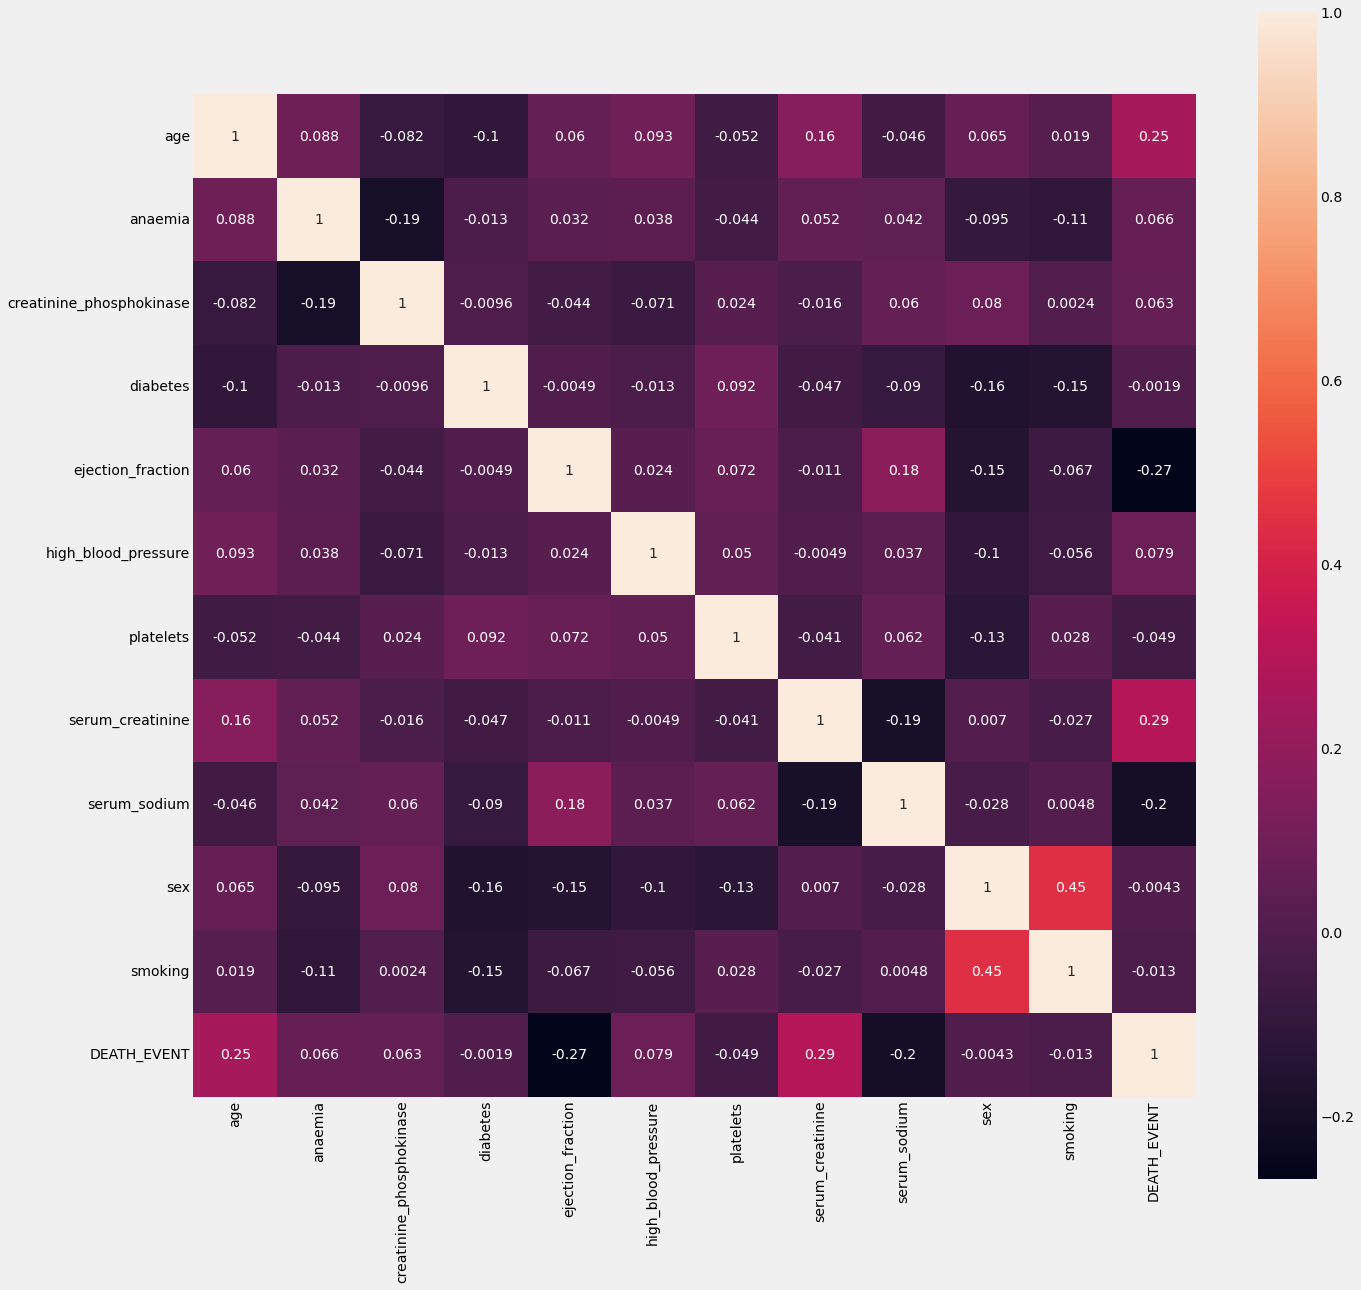

In [111]:
plt.figure(figsize=(20, 20))

sns.heatmap(heart_failure_cor, annot=True, square = True)
plt.show()

In [112]:
plt.style.use('fivethirtyeight')

'''creating useful list of feature names for future ease in coding'''
continous_feature = ['age' , 'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets' , 'serum_creatinine' ,'serum_sodium']
discrete_feature = ['anaemia' , 'diabetes' , 'high_blood_pressure' , 'sex' , 'smoking']

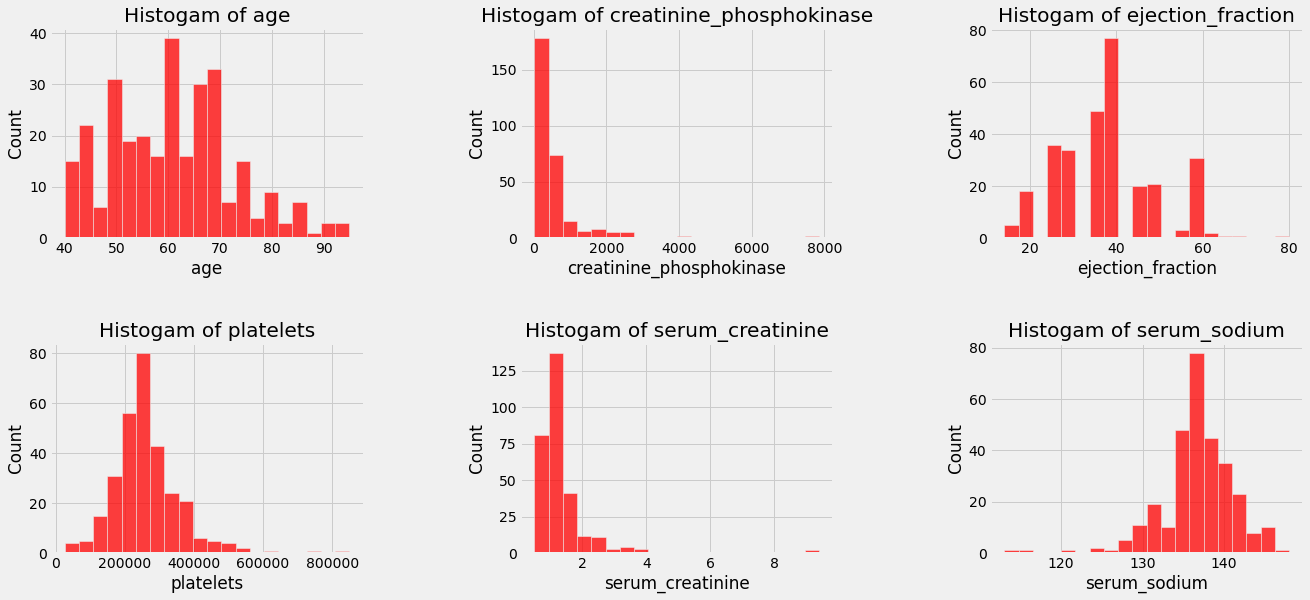

In [113]:
plt.figure(1, figsize = (20,9))
n = 0
for x in continous_feature:
    
    n += 1
    plt.subplot(2 , 3 , n )
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(heart_failure[x] , bins = 20 , color = 'red')
    plt.title('Histogam of {}'.format(x))
    
plt.show()

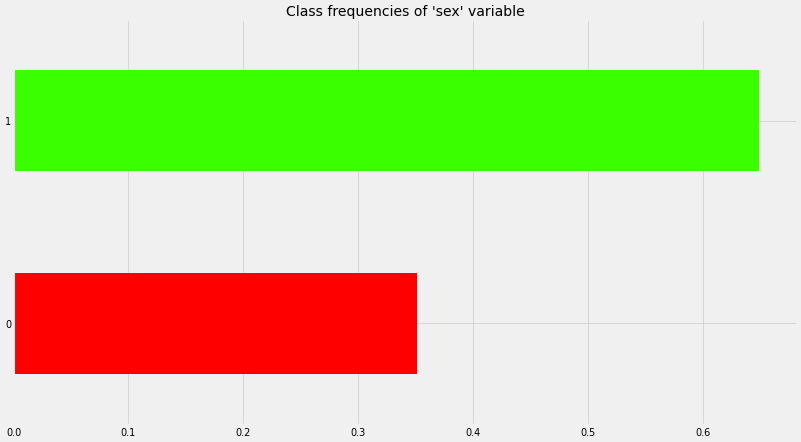

In [114]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(heart_failure["sex"].value_counts(ascending = True, normalize = True).plot.barh(color= ["#FF0000", "#3AFF00"]).set_title("Class frequencies of 'sex' variable"));

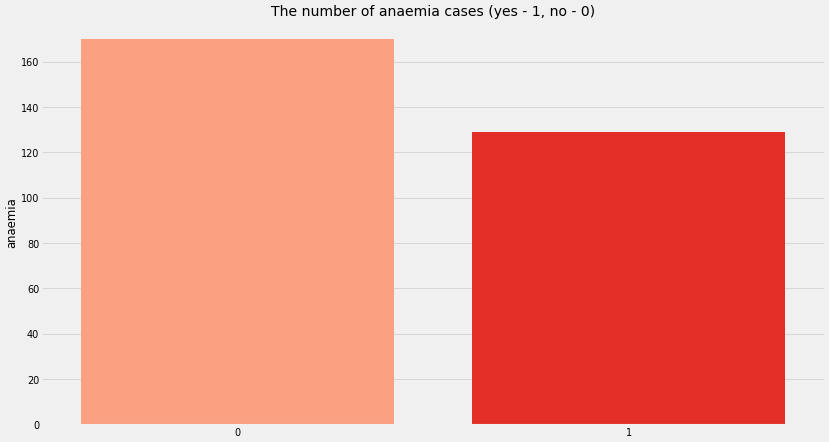

In [115]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = heart_failure["anaemia"].value_counts().index,
            y = heart_failure["anaemia"].value_counts(),
            data = heart_failure, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

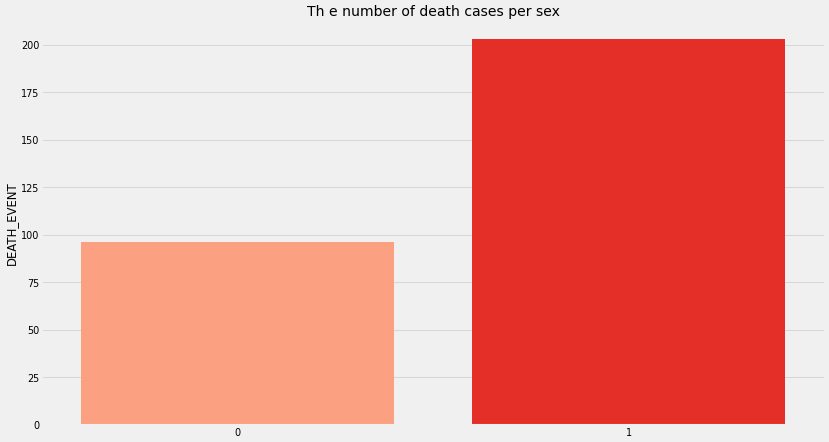

In [116]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = heart_failure["sex"].value_counts().index,
            y = heart_failure["DEATH_EVENT"].value_counts(),
            data = heart_failure, palette = "Reds", 
            saturation = 1).set(title = "Th e number of death cases per sex");

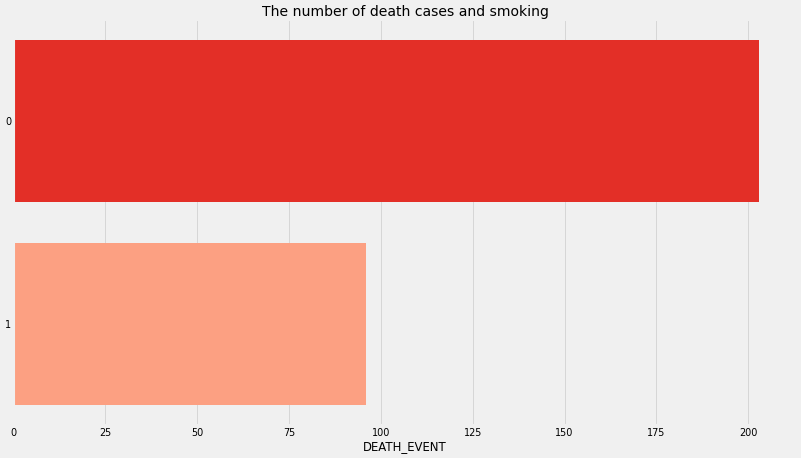

In [117]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = heart_failure["smoking"].value_counts().index,
            x = heart_failure["DEATH_EVENT"].value_counts(),
            data = heart_failure, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

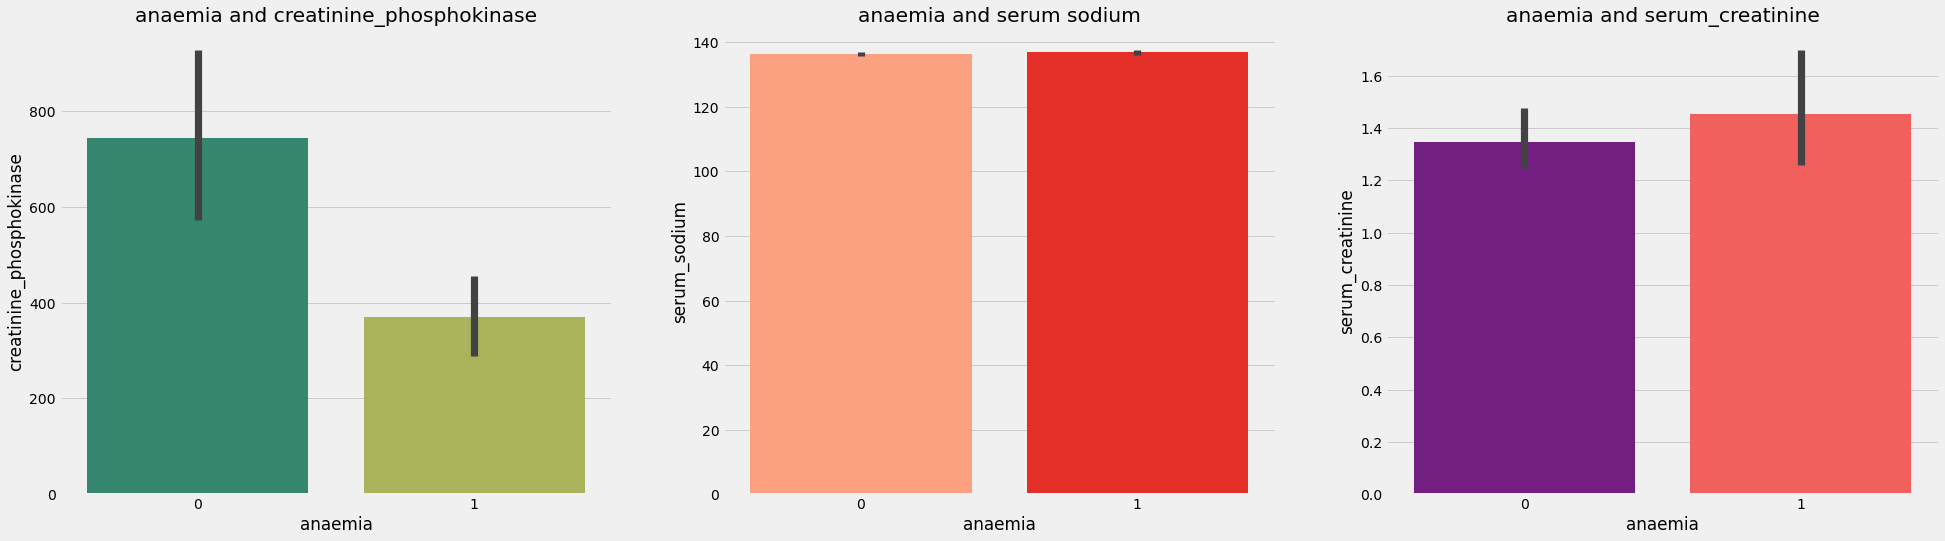

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle("")

sns.barplot(ax = axes[0],
            x = "anaemia",
            y = "creatinine_phosphokinase",
            data = heart_failure, palette = "gist_earth",
            saturation = 1)
axes[0].set_title("anaemia and creatinine_phosphokinase")

sns.barplot(ax = axes[1],
            x = "anaemia",
            y = "serum_sodium",
            data = heart_failure, palette = "Reds",
            saturation = 1)
axes[1].set_title("anaemia and serum sodium")

sns.barplot(ax = axes[2],
            x = "anaemia",
            y = "serum_creatinine",
            data = heart_failure, palette = "magma", 
            saturation = 1)
axes[2].set_title("anaemia and serum_creatinine");  

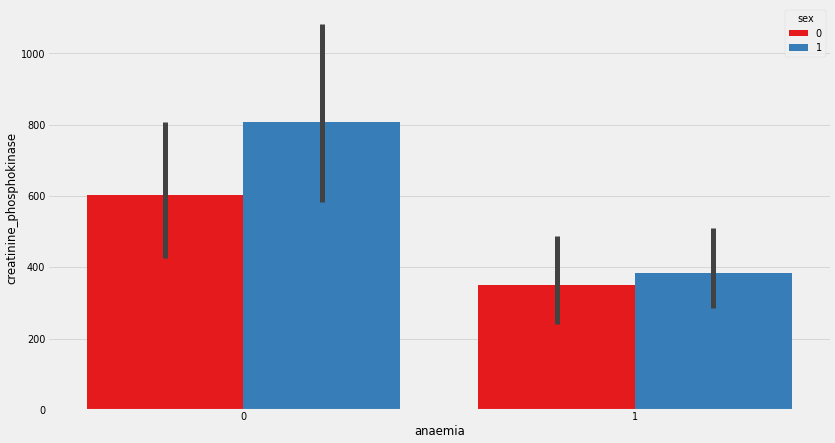

In [119]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = "anaemia", y = "creatinine_phosphokinase", hue = "sex",
            data = heart_failure, palette = "Set1", saturation = 1);

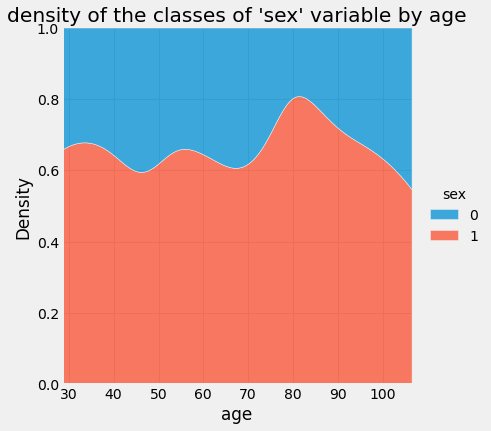

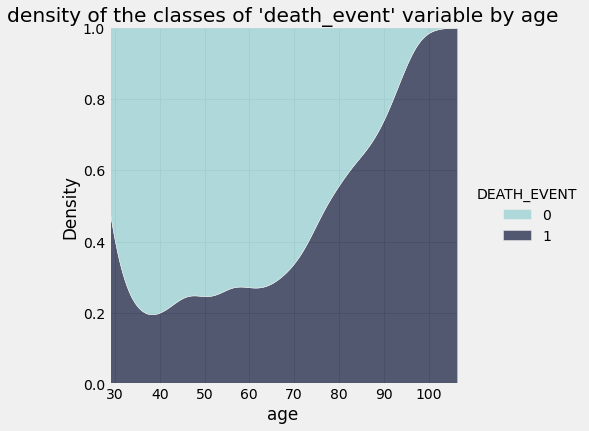

In [120]:
sns.displot(
    data = heart_failure,
    x = "age", hue = "sex",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    color = "#FE6203",).set(title = "density of the classes of 'sex' variable by age");


sns.displot(
    data = heart_failure,
    x = "age", hue = "DEATH_EVENT",
    kind = "kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",).set(title = "density of the classes of 'death_event' variable by age");

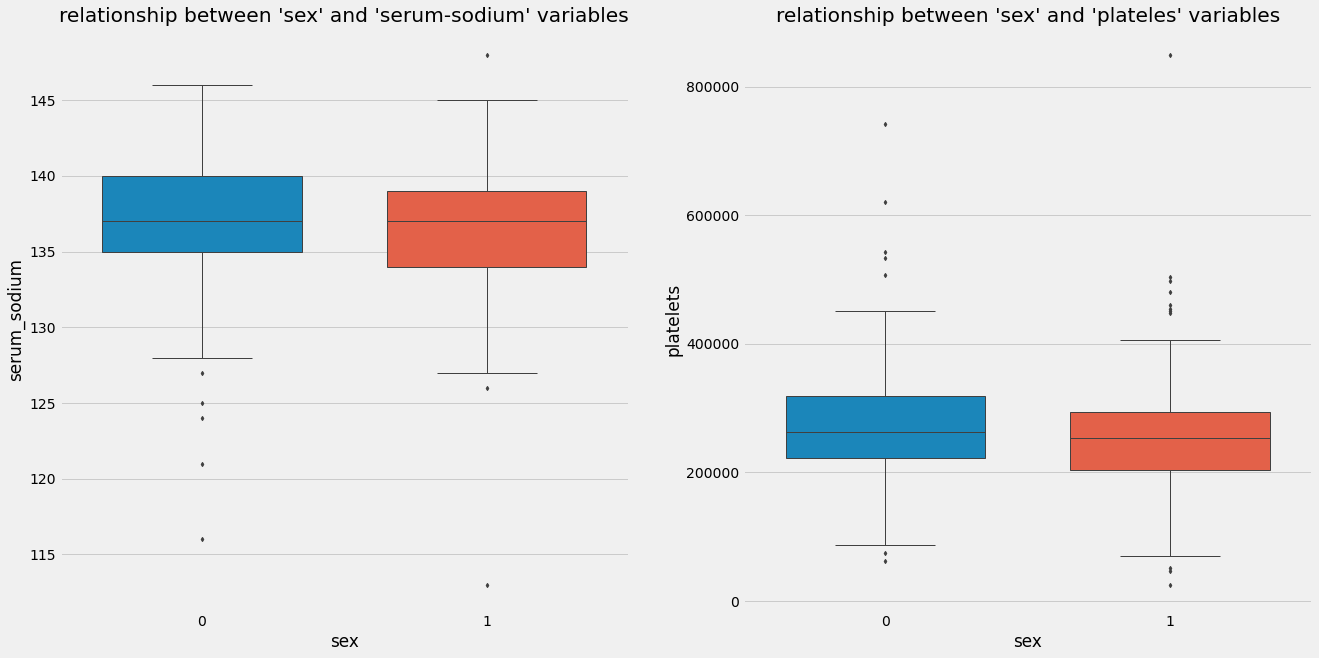

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


sns.boxplot(ax = axes[0], x = "sex", y = "serum_sodium", data = heart_failure, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[0].set_title("relationship between 'sex' and 'serum-sodium' variables");

sns.boxplot(ax = axes[1], x = "sex", y = "platelets", data = heart_failure, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[1].set_title("relationship between 'sex' and 'plateles' variables");

# Data Preprocessing

In [122]:
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [123]:
x = heart_failure.drop(columns=["DEATH_EVENT"])
y = heart_failure["DEATH_EVENT"]

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [126]:
x_train[0:5]

array([[ 1.16420244,  1.13933179, -0.35037003, -0.82649779, -2.00086672,
        -0.73616267, -1.43956795, -0.18870542,  0.13125912,  0.74293206,
        -0.67625223],
       [ 1.16420244, -0.87770745, -0.50593309, -0.82649779, -0.02267169,
         1.35839541, -0.40847646,  1.12060172, -0.54581131,  0.74293206,
        -0.67625223],
       [-0.03281933,  1.13933179, -0.50064183,  1.2099246 , -0.71073953,
        -0.73616267,  1.34544205,  0.11344238, -0.09443102,  0.74293206,
        -0.67625223],
       [-0.75664461, -0.87770745, -0.47101077, -0.82649779, -0.71073953,
        -0.73616267, -0.47225532, -0.69228509, -0.09443102,  0.74293206,
         1.4787382 ],
       [ 2.75098914, -0.87770745,  0.0052027 ,  1.2099246 , -0.02267169,
         1.35839541,  0.00989189,  0.44580496, -0.54581131,  0.74293206,
        -0.67625223]])

In [127]:
x_test[0:5]

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.02758338e-01,
         1.20992460e+00,  1.49345268e-01, -7.36162675e-01,
  

# Pendefinisian Model

**Ensemble learning** adalah algoritma yang menggunakan beberapa klasifikasi kemudian membuat titik data baru dengan cara mengambil bobot prediksi. Tujuan utama dari ensemble learning adalah untuk menentukan atau menemukan set terbaik berdasarkan bobot datanya untuk dipisah menjadi 1 set data baru. Karena setiap algoritma tidak selalu bernilai akurat maka diperlukan ensemble learning model untuk memberikan gambaran secara menyeluruh dan menapatkan hasil yang lebih akurat. Ensemble learning dapat mengurangi penyebaran (dispersi) dari prediksi dan performa model.

**Metode Stacking**  merupakan cara untuk mengkombinasi beberapa model, dengan konsep meta learner. Stacking menggunakan algoritma meta-learner terbaik menggabungkan prediksi dari dua atau lebi algorima pembelajaran mesin dasar. Manfaat metode ini adalah memanfaatkan kemampuan berbagai model yang berkinerja baik pada tugas klasifikasi atau regresi dam membuat prediksi yang memiliki kinerja yang lebih baik daripada model tungal dimanapun dalam ensemble. Untuk algoritma machine learning yang akan digabungkan adalah Logistic Regression, K-Nearest Neighbors, SVM dan Decision TreeClassifier.

In [128]:
# Pendefinisioan model yang digunakan untuk metode Stacking
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 5)
destree = DecisionTreeClassifier(max_depth = 5)
svm = LinearSVC(random_state = 42)

In [129]:
# Pendefinisian model untuk Stacking Method
stck = StackingClassifier([('clf1', knn), ('clf2', destree), ('clf3', svm)], final_estimator = logreg)

# Evaluasi Model

In [130]:
em = stck.fit(x_train, y_train)

In [131]:
y_pred = em.predict(x_test)

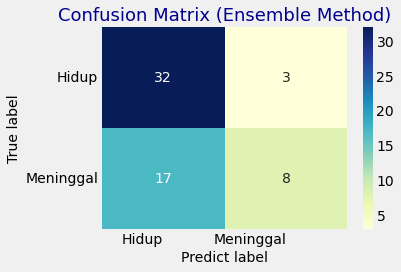

In [132]:
# Confusion matrix
confusion_matrix_data = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Hidup', 'Meninggal'), ('Hidup', 'Meninggal'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_data, annot = True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix (Ensemble Method)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predict label', fontsize=14)
plt.tight_layout()
plt.show()

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        35
           1       0.73      0.32      0.44        25

    accuracy                           0.67        60
   macro avg       0.69      0.62      0.60        60
weighted avg       0.68      0.67      0.63        60



Pada cofusion matriks dapat dilihat untuk angka prediksi benar pasien hidup lebih tinggi. Pada data klasifikasi data presisi model untuk data pasien hidup lebih tinggi daripada pasien meninggal. 

In [134]:
for clf, clf_name in zip([logreg, destree, knn, svm], ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM']):
  print('-----')
  print(f'Prediction using {clf_name}')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test) 
  print(classification_report(y_test, y_pred))

-----
Prediction using Logistic Regression
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        35
           1       0.70      0.28      0.40        25

    accuracy                           0.65        60
   macro avg       0.67      0.60      0.58        60
weighted avg       0.67      0.65      0.61        60

-----
Prediction using Decision Tree
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        35
           1       0.69      0.36      0.47        25

    accuracy                           0.67        60
   macro avg       0.68      0.62      0.61        60
weighted avg       0.67      0.67      0.64        60

-----
Prediction using KNN
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        35
           1       0.86      0.24      0.38        25

    accuracy                           0.67        60
   macro avg       0.

Data diatas adalah data hasil prediksi untuk masing masing model. Dari banyak model akan digabungkan sehingga mendapat model yang lebih akurat. 

In [135]:
# Mengecek keakuratan model 
print("Test Score:\n",em.score(x_train,y_train)*100)

Test Score:
 85.35564853556485


Test Score menunjukkan tingkat akurasi model pada data pelatihan. Angka 85.3% menunjukkan bahwa model memiliki tingkat keakuratan sebesar itu dalam memprediksi data pelatihan.

# Model Inference

In [136]:
X_to_test = heart_failure.copy()

In [137]:
to_inference = {'age' : [35, 45],
                'anaemia' : [1, 1],
                'creatinine_phosphokinase' : [221, 342],
                'diabetes' : [1, 1],
                'ejection_fraction' : [15, 30],
                'high_blood_pressure' : [0, 1],
                'platelets' : [123000.00, 255000.00],
                'serum_creatinine' : [1.7, 2.1],
                'serum_sodium' : [125, 132],
                'sex' : [1, 1],
                'smoking' : [0, 0]}

In [138]:
pd.DataFrame(to_inference)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,35,1,221,1,15,0,123000.0,1.7,125,1,0
1,45,1,342,1,30,1,255000.0,2.1,132,1,0


In [139]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [140]:
X_to_test = pd.get_dummies(X_to_test)
X_to_test = X_to_test[-2:]
X_to_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
299,35.0,1,221,1,15,0,123000.0,1.7,125,1,0,NaN
300,45.0,1,342,1,30,1,255000.0,2.1,132,1,0,NaN


In [141]:
X_to_test = X_to_test.drop(columns = 'DEATH_EVENT')

In [142]:
# Melakukan prediksi menggunakan model ensemble
inference = em.predict(X_to_test)

In [143]:
# Definisikan dictionary untuk pemetaan nilai prediksi ke dalam kategori yang diinginkan
prediction_mapping = {1: "Yes", 0: "No"}

In [144]:
# Lakukan pemetaan untuk setiap nilai prediksi
death = [prediction_mapping[prediction] for prediction in inference]

print(death)

['No', 'No']


Hasil prediksi death event data set baru untuk 2 data terakhir yaitu **pasien hidup** selama periode pengamatan. 

# Kesimpulan

1. Pada Dataset dilakukan cleansing data dengan mengecek missing value dan duplikat data. Kemudian hasil yang ditampilkan dataset ini tidak memiliki missing value dan duplikat data yang perlu di bersihkan.
2. Pemisahan dataset menjadi data pelatihan (training data) dan data uji (testing data) adalah 80% data pelatihan dan 20% data uji. Pemisahan dataset ini merupakan langkah yang penting dalam pengembangan dan evaluasi model, karena memungkinkan kita untuk menguji model pada data yang independen dan menghindari overfitting (kelebihan penyesuaian) di mana model berkinerja sangat baik pada data pelatihan.
1. Pada konfusion matriks diprediksi benar pasien hidup lebih besar bernilai 32. Untuk prediksi benar pasien meninggal bernilai 3. Diprediksi salah pasien hidup sebesar 17 dan diprediksi salah pasien meninggal sebesar 8. 
2. Metode Stacking merupakan cara untuk mengkombinasi beberapa model, memanfaatkan kemampuan berbagai model yang berkinerja baik pada tugas klasifikasi atau regresi dam membuat prediksi yang memiliki kinerja yang lebih baik daripada model tungal dimanapun dalam ensemble. Dari uji model didapat keakuratan model sebesar 85.3%
3. Dari data set baru yang dibuat di bagian model inference, dapat di test dengan menggunakan ensemble model yang sudah dibuat. Dari uji data, dapat di prediksi death event 2 data terakhir.
4. Dengan menggunakan decision tree, SVM, logistic regression, dan KNN, ditemukan bahwa model decision tree memberikan hasil akurasi yang paling baik dengan nilai 0.66. Selanjutnya, model KNN memiliki nilai akurasi sebesar 0.64, diikuti oleh logistic regression dengan nilai akurasi sebesar 0.64 dan SVM dengan nilai akurasi sebesar 0.63. Dari hasil tersebut dapat disimpulkan bahwa penggunaan decision tree lebih tepat dalam memprediksi kemungkinan terjadinya kegagalan jantung pada pasien dibandingkan dengan penggunaan model lainnya.